In [61]:
pip install imgaug

     |████████████████████████████████| 948 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 20.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import albumentations as A
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import random

In [21]:
img = Image.open("loom.jpg")
img = np.array(img)
question = Image.open("question.jpg")
question = np.array(question)

In [33]:
equalize = A.Equalize(p=1)
ytranslate = random.choice([A.Affine(translate_percent=({"x":0, "y":random.randrange(-30, 10, 1)/100}), p=1), 
                            A.Affine(translate_percent=({"x":0, "y":random.randrange(10, 30, 1)/100}), p=1)])
hflip = A.HorizontalFlip(p=1)
shear = random.choice([A.Affine(shear=random.randrange(-40, -10, 1), p=1), 
                       A.Affine(shear=random.randrange(10, 40, 1), p=1)]) # Shear, reosnable degree values are between -40 to 40
# crop = A.RandomSizedBBoxSafeCrop(p=1)

# Combining transformations
hflip_equalize = A.Compose([
    A.HorizontalFlip(p=1),
    A.Equalize(p=1)
])
ytranslate_hflip_equalize = A.Compose([
    ytranslate,
    A.HorizontalFlip(p=0.5),
    A.Equalize(p=1)
])
shear_hflip_equalize = A.Compose([
    shear,
    A.HorizontalFlip(p=0.5),
    A.Equalize(p=1)
])

# crop_hflip_equalize = A.Compose([
#     A.A.RandomSizedBBoxSafeCrop(p=1),
#     A.HorizontalFlip(p=0.5),
#     A.Equalize(p=1)
# ])



In [34]:
# Produce transformed images
img_equalize = equalize(image=img)["image"]
img_ytranslate = ytranslate(image=img)["image"]
img_hflip = hflip(image=img)["image"]
img_shear = shear(image=img)["image"]
img_hflip_equalize = hflip_equalize(image=img)["image"]
img_ytranslate_hflip_equalize = ytranslate_hflip_equalize(image=img)["image"]
img_shear_hflip_equalize = shear_hflip_equalize(image=img)["image"]

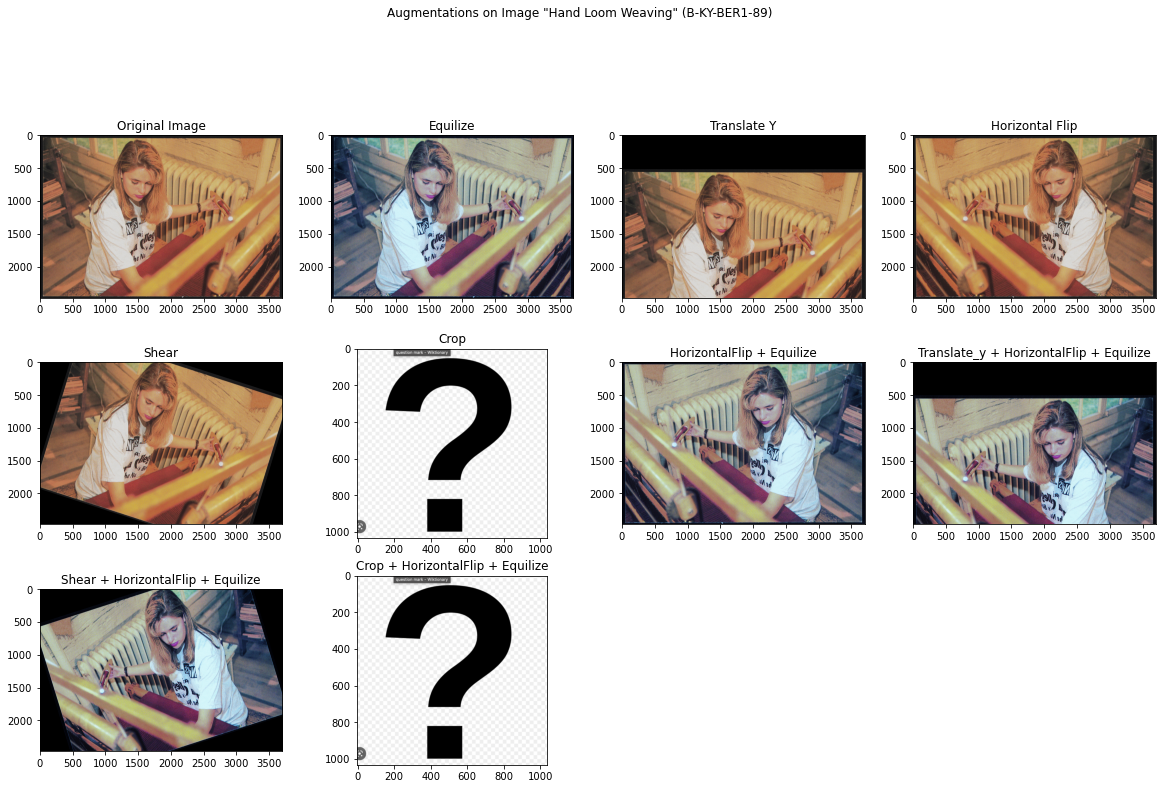

In [35]:
fig = plt.figure(figsize=(20, 16))

fig.suptitle('Augmentations on Image "Hand Loom Weaving" (B-KY-BER1-89)')

plt.subplot(4,4,1)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(4,4,2)
plt.title("Equilize")
plt.imshow(img_equalize)

plt.subplot(4,4,3)
plt.title("Translate Y")
plt.imshow(img_ytranslate)

plt.subplot(4,4,4)
plt.title("Horizontal Flip")
plt.imshow(img_hflip)

plt.subplot(4,4,5)
plt.title("Shear")
plt.imshow(img_shear)

plt.subplot(4,4,6)
plt.title("Crop")
plt.imshow(question)

plt.subplot(4,4,7)
plt.title("HorizontalFlip + Equilize")
plt.imshow(img_hflip_equalize)

plt.subplot(4,4,8)
plt.title("Translate_y + HorizontalFlip + Equilize")
plt.imshow(img_ytranslate_hflip_equalize)

plt.subplot(4,4,9)
plt.title("Shear + HorizontalFlip + Equilize")
plt.imshow(img_shear_hflip_equalize)

plt.subplot(4,4,10)
plt.title("Crop + HorizontalFlip + Equilize")
plt.imshow(question)

# plt.subplots_adjust(hspace=.1)
print()